## Consumer_Complaints - Exercise 13 - The Iron Yard - Cohort 5

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Initial data assessment:
1. the only non-date numeric data is the complaint ID and the zip code.
2. core data requires an assessment of string complaints.
3. there are 11,543 complaints.  Corresponds to number of row: Initially assumed to be a good index value.
4. Complaint ID will be the index column.

In [7]:
consumer_complaints = pd.read_csv('complaints_dec_2014.csv')
consumer_complaints.describe()


,Complaint ID,ZIP code
count,11543.000000,11409.000000
mean,1157276.786451,50259.375756
std,11908.384438,30712.384693
min,1136157.000000,10.000000
25%,1146708.500000,23234.000000
50%,1156954.000000,44203.000000
75%,1167656.000000,78623.000000
max,1178091.000000,99712.000000


In [8]:
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [9]:
consumer_complaints.tail()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
11538,1136172,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,LA,70452,Web,12/01/2014,12/05/2014,"Servis One, Inc.",Closed with explanation,No,NaN
11539,1136170,Mortgage,FHA mortgage,Credit decision / Underwriting,NaN,NaN,74432,Web,12/01/2014,12/01/2014,Experian,Closed with explanation,Yes,NaN
11540,1136169,Mortgage,FHA mortgage,Credit decision / Underwriting,NaN,NaN,74432,Web,12/01/2014,12/01/2014,TransUnion,Closed with non-monetary relief,Yes,NaN
11541,1136162,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,MI,48382,Fax,12/01/2014,12/05/2014,Citibank,Closed with explanation,Yes,NaN
11542,1136158,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,IL,60148,Web,12/01/2014,12/01/2014,Nationstar Mortgage,Closed with explanation,Yes,NaN


In [15]:
ds_one = consumer_complaints[['Complaint ID','Product', 'Issue', 'Date received', 'Company']]

In [20]:
ds_one.head()

,Complaint ID,Product,Issue,Date received,Company
0,1177167,Debt collection,Cont'd attempts collect debt not owed,12/31/2014,Ad Astra Recovery Services Inc
1,1177166,Debt collection,Cont'd attempts collect debt not owed,12/31/2014,"Unique Management Services, Inc"
2,1177165,Debt collection,Cont'd attempts collect debt not owed,12/31/2014,"CL Holdings, LLC"
3,1177164,Debt collection,Cont'd attempts collect debt not owed,12/31/2014,"Enhanced Recovery Company, LLC"
4,1177163,Debt collection,Cont'd attempts collect debt not owed,12/31/2014,"Enhanced Acquisitions, LLC"


In [30]:
company_num = len(ds_one.Company.unique())

In [31]:
company_num

1000

In [32]:
issue_num = len(ds_one.Issue.unique())

In [33]:
issue_num

85

Number of Complaints by Product:

In [49]:
ds_one.Product.value_counts()

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
dtype: int64

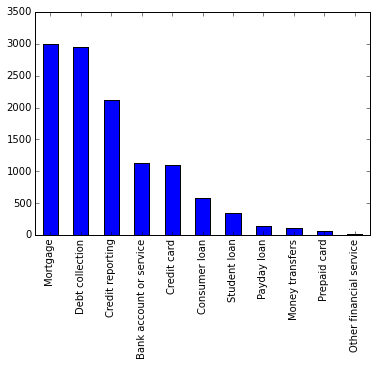

In [59]:
ds_one.Product.value_counts().plot(kind='bar')

Number of Complaints by Top Ten Companies

In [65]:
ds_one.Company.value_counts().head(10)

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
dtype: int64

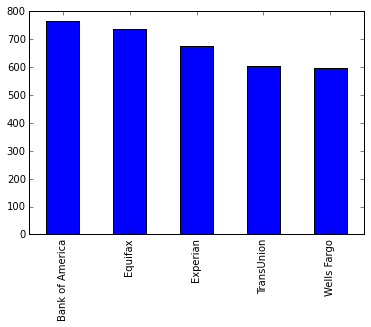

In [66]:
ds_one.Company.value_counts().head().plot(kind='bar')


New data frame for the next two questions:

In [67]:
ds_two = consumer_complaints[['Complaint ID', 'Date received','Company response']]

In [68]:
ds_two.head()

,Complaint ID,Date received,Company response
0,1177167,12/31/2014,Closed with explanation
1,1177166,12/31/2014,Closed with explanation
2,1177165,12/31/2014,Closed with monetary relief
3,1177164,12/31/2014,Closed with non-monetary relief
4,1177163,12/31/2014,Closed with explanation


In [101]:
ds_two['Company response'].value_counts()

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
dtype: int64

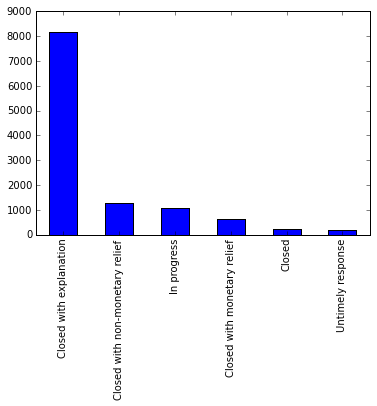

In [103]:
ds_two['Company response'].value_counts().plot(kind='bar')

In [104]:
ds_two.head()

,Complaint ID,Date received,Company response
0,1177167,12/31/2014,Closed with explanation
1,1177166,12/31/2014,Closed with explanation
2,1177165,12/31/2014,Closed with monetary relief
3,1177164,12/31/2014,Closed with non-monetary relief
4,1177163,12/31/2014,Closed with explanation


In [118]:
ds_two['Date received'].value_counts()

12/04/2014    571
12/10/2014    570
12/30/2014    550
12/17/2014    539
12/22/2014    537
12/29/2014    532
12/18/2014    527
12/08/2014    526
12/02/2014    516
12/16/2014    510
12/09/2014    503
12/23/2014    501
12/03/2014    494
12/11/2014    484
12/15/2014    475
12/01/2014    474
12/12/2014    428
12/05/2014    426
12/31/2014    371
12/19/2014    363
12/24/2014    315
12/26/2014    229
12/28/2014    164
12/20/2014    148
12/06/2014    147
12/13/2014    144
12/14/2014    130
12/07/2014    117
12/27/2014    104
12/21/2014     96
12/25/2014     52
dtype: int64

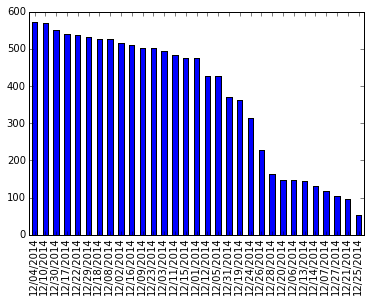

In [119]:
ds_two['Date received'].value_counts().plot('bar')

In [120]:
ds_three = ds_two[['Date received', 'Company response']]

In [122]:
ds_three.head()

,Date received,Company response
0,12/31/2014,Closed with explanation
1,12/31/2014,Closed with explanation
2,12/31/2014,Closed with monetary relief
3,12/31/2014,Closed with non-monetary relief
4,12/31/2014,Closed with explanation


In [123]:
ds_three['Date received'].head()

0    12/31/2014
1    12/31/2014
2    12/31/2014
3    12/31/2014
4    12/31/2014
Name: Date received, dtype: object

In [124]:
date_series = ds_three.pop('Date received')

In [125]:
date_series.head()

0    12/31/2014
1    12/31/2014
2    12/31/2014
3    12/31/2014
4    12/31/2014
Name: Date received, dtype: object

In [126]:
ds_three.head()

,Company response
0,Closed with explanation
1,Closed with explanation
2,Closed with monetary relief
3,Closed with non-monetary relief
4,Closed with explanation


In [129]:
ds_three.index = pd.to_datetime(date_series, format='%m/%d/%Y')

In [130]:
ds_three.head()

,Company response
Date received,
2014-12-31,Closed with explanation
2014-12-31,Closed with explanation
2014-12-31,Closed with monetary relief
2014-12-31,Closed with non-monetary relief
2014-12-31,Closed with explanation


In [131]:
ds_three['day_of_week'] = ds_three.index.to_series().map(lambda d: d.weekday())

/Users/bamand/tiy/week4/consumer-complaints/.direnv/python-3.4.3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [132]:
ds_three.head()

,Company response,day_of_week
Date received,,
2014-12-31,Closed with explanation,2
2014-12-31,Closed with explanation,2
2014-12-31,Closed with monetary relief,2
2014-12-31,Closed with non-monetary relief,2
2014-12-31,Closed with explanation,2


In [133]:
ds_three['day_of_week'].value_counts()

1    2580
0    2544
2    2289
3    1634
4    1446
5     543
6     507
dtype: int64

The code is Monday = 0 through Sunday = 6.  Initially, it would appear that Tuesday, Monday, and Wednesday are the most popular days for submitting complaints in December.  However, the distribution of the holidays and key shopping days likely make December a poor month to study overall behavior.  

In [142]:
(ds_three['day_of_week'].value_counts() / ds_three['Date received']).plot(kind='bar')

KeyError: 'Date received'